In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_dir = 'C:\\Users\\Akshay\\Downloads\\Python\\Tensorflow and Keras\\TF_2_Notebooks_and_Data\\04-CNNs\\cell_images'

In [3]:
test_path = data_dir+'\\test\\'
train_path = data_dir+'\\train\\'

In [4]:
os.listdir(train_path+'parasitized')[0]

'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [5]:
parasitized_cell = train_path+'parasitized\\'+'C100P61ThinF_IMG_20150918_144104_cell_162.png'
parasitized_cell

'C:\\Users\\Akshay\\Downloads\\Python\\Tensorflow and Keras\\TF_2_Notebooks_and_Data\\04-CNNs\\cell_images\\train\\parasitized\\C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [6]:
plt.imread(parasitized_cell).shape

(148, 142, 3)

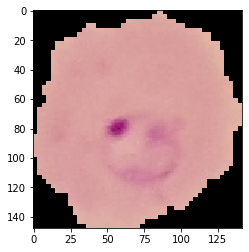

In [7]:
plt.imshow(plt.imread(parasitized_cell))

In [8]:
os.listdir(train_path+'uninfected')[0]

'C100P61ThinF_IMG_20150918_144104_cell_128.png'

In [9]:
uninfected_cell = train_path+'uninfected\\'+'C100P61ThinF_IMG_20150918_144104_cell_128.png'
uninfected_cell

'C:\\Users\\Akshay\\Downloads\\Python\\Tensorflow and Keras\\TF_2_Notebooks_and_Data\\04-CNNs\\cell_images\\train\\uninfected\\C100P61ThinF_IMG_20150918_144104_cell_128.png'

In [10]:
plt.imread(uninfected_cell).shape

(139, 160, 3)

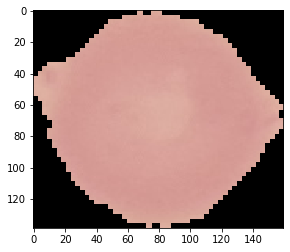

In [11]:
plt.imshow(plt.imread(uninfected_cell))

In [13]:
l1 = []
l2 = []
for i in os.listdir(test_path+'\\uninfected'):
    img = plt.imread(test_path+'\\uninfected\\'+i)
    i1, i2, colors = img.shape
    l1.append(i1)
    l2.append(i2)
print(np.mean(l1))
print(np.mean(l2))

130.92538461538462
130.75


In [14]:
image_shape = (130, 130, 3)

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_generator = ImageDataGenerator(rotation_range = 20, width_shift_range = 0.10, height_shift_range = 0.10, rescale = 1/255, 
                                    shear_range = 0.1, zoom_range = 0.1, horizontal_flip = True, fill_mode = "nearest")

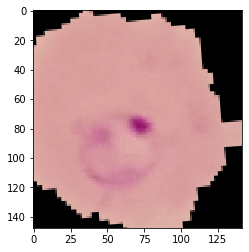

In [20]:
plt.imshow(image_generator.random_transform(plt.imread(parasitized_cell)))

In [23]:
plt.imread(parasitized_cell).shape

(148, 142, 3)

In [24]:
image_generator.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [25]:
image_generator.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


In [26]:
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential

In [30]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = image_shape, activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3), input_shape = image_shape, activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3), input_shape = image_shape, activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 12544)            

In [31]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = 'val_loss', patience = 2)

In [32]:
batch_size = 16

train_image_generator = image_generator.flow_from_directory(train_path, target_size= image_shape[:2], color_mode= 'rgb',
                                                           batch_size = batch_size, class_mode= 'binary')

test_image_generator = image_generator.flow_from_directory(test_path, target_size= image_shape[:2], color_mode= 'rgb',
                                                           batch_size = batch_size, class_mode= 'binary', shuffle= False)

Found 24958 images belonging to 2 classes.
Found 2600 images belonging to 2 classes.


In [33]:
results = model.fit_generator(train_image_generator, epochs= 20, validation_data= test_image_generator, callbacks= [early_stop])

Epoch 1/20
1560/1560 [==============================] - 450s 289ms/step - loss: 0.3762 - accuracy: 0.8353 - val_loss: 0.1888 - val_accuracy: 0.9458
Epoch 2/20
1560/1560 [==============================] - 449s 288ms/step - loss: 0.1858 - accuracy: 0.9426 - val_loss: 0.1784 - val_accuracy: 0.9431
Epoch 3/20
1560/1560 [==============================] - 470s 301ms/step - loss: 0.1687 - accuracy: 0.9488 - val_loss: 0.1622 - val_accuracy: 0.9512
Epoch 4/20
1560/1560 [==============================] - 521s 334ms/step - loss: 0.1652 - accuracy: 0.9492 - val_loss: 0.1579 - val_accuracy: 0.9500
Epoch 5/20
1560/1560 [==============================] - 492s 315ms/step - loss: 0.1556 - accuracy: 0.9497 - val_loss: 0.1502 - val_accuracy: 0.9500
Epoch 6/20
1560/1560 [==============================] - 504s 323ms/step - loss: 0.1528 - accuracy: 0.9511 - val_loss: 0.1553 - val_accuracy: 0.9469
Epoch 7/20
1560/1560 [==============================] - 582s 373ms/step - loss: 0.1541 - accuracy: 0.9511 - val_

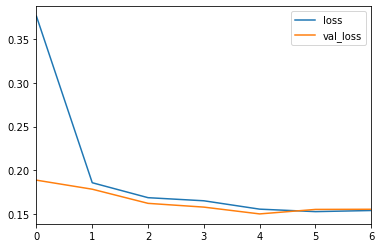

In [34]:
losses = pd.DataFrame(model.history.history)
losses[['loss', 'val_loss']].plot()

In [35]:
model.evaluate_generator(test_image_generator)

[0.15446263269315605, 0.94846153]

In [36]:
model.metrics_names

['loss', 'accuracy']

In [37]:
pred_prob = model.predict_generator(test_image_generator)

In [38]:
pred = pred_prob > 0.5

In [39]:
from sklearn.metrics import confusion_matrix, classification_report

In [40]:
print(confusion_matrix(test_image_generator.classes, pred))

[[1219   81]
 [  60 1240]]


In [42]:
print(classification_report(test_image_generator.classes, pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      1300
           1       0.94      0.95      0.95      1300

    accuracy                           0.95      2600
   macro avg       0.95      0.95      0.95      2600
weighted avg       0.95      0.95      0.95      2600



In [43]:
from tensorflow.keras.preprocessing import image

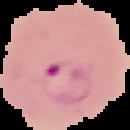

In [44]:
img = image.load_img(parasitized_cell, target_size= image_shape)
img

In [45]:
type(img)

PIL.Image.Image

In [47]:
img = image.img_to_array(img)
type(img)

numpy.ndarray

In [48]:
img = np.expand_dims(img, axis = 0)
img.shape

(1, 130, 130, 3)

In [49]:
model.predict(img)

array([[0.]], dtype=float32)